# Projeto Final - Resilia / Ifood

### Grupo 4 
* Caroline Suwaki
* Demétrio Fragoso
* Ramon Brito

### Análise exploratória dos Dados 
NETFLIX (Demétrio Fragoso)

### Importação das bibliotecas 

In [1]:
import seaborn as sns

In [2]:
import datetime as dt

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
from PIL import Image

In [8]:
from os import path

In [9]:
# Importando a base de dados da NETFLIX.
df = pd.read_csv('Base dados\ViewingActivity.csv')
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Djalma Costa,2020-09-04 20:30:05,00:38:41,NaN,Dançarina Imperfeita,NaN,LG 2013 MTK Smart TV,01:26:23,01:26:23,BR (Brazil)
1,Djalma Costa,2020-09-04 19:34:44,00:07:05,NaN,Dançarina Imperfeita,NaN,LG 2013 MTK Smart TV,00:45:52,Not latest view,BR (Brazil)
2,Djalma Costa,2020-02-11 00:01:01,00:06:17,NaN,Cinderela,NaN,Google Chromecast V5 Streaming Stick,00:08:41,00:08:41,BR (Brazil)
3,Djalma Costa,2020-02-11 00:00:09,00:00:39,NaN,Cinderella 3D,NaN,Google Chromecast V5 Streaming Stick,00:04:09,00:04:09,BR (Brazil)
4,Djalma Costa,2020-02-10 23:50:34,00:09:28,NaN,Alguém Especial,NaN,Google Chromecast V5 Streaming Stick,00:09:28,00:09:28,BR (Brazil)


In [10]:
# Todas as colunas como object, será preciso tratar algumas delas.
df.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

## Alterações no DateFrame (tipo, criação colunas)

In [11]:
# Alterando para datetime a coluna start time e convertendo no horario(brasil UTC-03:00)  
df['Start Time'] = pd.to_datetime(df['Start Time'],utc=True)
df = df.set_index('Start Time')
df.index = df.index.tz_convert('America/Sao_Paulo')
df = df.reset_index()

# Criando as colunas Ano,Mês, dia e dia da semana
df['Ano'], df['Mês'] = df['Start Time'].dt.year, df['Start Time'].dt.month_name()
df['Dia'] = df['Start Time'].dt.day
df['hour'] = df['Start Time'].dt.hour
df['Dia da Semana'] = df['Start Time'].dt.day_name()

# Alterando o tipo do dado na coluna duração, inserindo a coluna duration (min)
df['Duration (min)'] = df['Duration'].str.split(':').apply(
    lambda x: float(x[0]) * 60.0 + float(x[1]) + float(x[2]) / 60.0)

# Criando as colunas de duração(hora) e (min)
df['Duration (hours)'] = df['Duration (min)']/60.0
df['Duration (days)'] = df['Duration (hours)']/24.0

In [12]:
# Dividindo a coluna 'Title' em duas colunas(Temporada e Episódio).
df[['Name Title','Temporada', 'Episódio']] = df['Title'].str.split(':',n=2, expand=True)
df.drop('Title', axis=1, inplace=True)

In [13]:
#Inserindo a coluna categoria (filme ou serie)
df['Type View'] = df.apply(lambda x:'Filme' if pd.isnull(x['Episódio']) else 'Serie TV' , axis=1)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype                            
---  ------                   --------------  -----                            
 0   Start Time               5730 non-null   datetime64[ns, America/Sao_Paulo]
 1   Profile Name             5730 non-null   object                           
 2   Duration                 5730 non-null   object                           
 3   Attributes               209 non-null    object                           
 4   Supplemental Video Type  383 non-null    object                           
 5   Device Type              5730 non-null   object                           
 6   Bookmark                 5730 non-null   object                           
 7   Latest Bookmark          5730 non-null   object                           
 8   Country                  5730 non-null   object                           
 9   Ano     

In [15]:
df.dtypes                

Start Time                 datetime64[ns, America/Sao_Paulo]
Profile Name                                          object
Duration                                              object
Attributes                                            object
Supplemental Video Type                               object
Device Type                                           object
Bookmark                                              object
Latest Bookmark                                       object
Country                                               object
Ano                                                    int64
Mês                                                   object
Dia                                                    int64
hour                                                   int64
Dia da Semana                                         object
Duration (min)                                       float64
Duration (hours)                                     float64
Duration (days)         

## Filtrando e limpeza dos dados

In [16]:
#Filtrando o meu usuário(conta está em nome da minha mãe)
df = df[(df['Profile Name'] == 'Iraci Costa')]

In [17]:
df.head()

,Start Time,Profile Name,Duration,Attributes,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Ano,...,Dia,hour,Dia da Semana,Duration (min),Duration (hours),Duration (days),Name Title,Temporada,Episódio,Type View
23,2021-07-14 21:14:32-03:00,Iraci Costa,00:00:09,Autoplayed: user action: None;,NaN,Roku El Paso Smart TV,00:00:47,00:00:47,BR (Brazil),2021,...,14,21,Wednesday,0.150000,0.002500,0.000104,"Paulo, Apóstolo de Cristo",None,None,Filme
24,2021-07-14 21:12:53-03:00,Iraci Costa,00:00:41,Autoplayed: user action: None;,NaN,Roku El Paso Smart TV,00:00:41,Not latest view,BR (Brazil),2021,...,14,21,Wednesday,0.683333,0.011389,0.000475,"Paulo, Apóstolo de Cristo",None,None,Filme
25,2021-07-14 21:10:46-03:00,Iraci Costa,00:00:06,Autoplayed: user action: None;,TRAILER,Roku El Paso Smart TV,00:00:06,00:00:06,BR (Brazil),2021,...,14,21,Wednesday,0.100000,0.001667,0.000069,Virgin River,Temporada 1 (Trailer),None,Filme
26,2021-07-14 21:10:33-03:00,Iraci Costa,00:00:06,Autoplayed: user action: None;,TRAILER,Roku El Paso Smart TV,00:00:06,00:00:06,BR (Brazil),2021,...,14,21,Wednesday,0.100000,0.001667,0.000069,Temporada 1 (Trailer),Biohackers,None,Filme
27,2021-07-14 21:09:40-03:00,Iraci Costa,00:00:43,Autoplayed: user action: None;,TEASER_TRAILER,Roku El Paso Smart TV,00:00:43,00:00:43,BR (Brazil),2021,...,14,21,Wednesday,0.716667,0.011944,0.000498,Temporada 1 (Teaser),Sweet Tooth,None,Filme


## Limpeza dos dados

Retirando as visualizações de **TRAILER/TEASER_TRAILER** para não contabilizar
o número de visualização e acabar 'maquiando' os dados. 

In [18]:
df.drop(df.loc[(df['Supplemental Video Type']=='TRAILER') | (df['Supplemental Video Type']=='TEASER_TRAILER')].index, inplace=True)

Limpeza das exibições de curta duração

In [19]:
df.drop(df[df['Duration']<'00:05:00'].index, inplace=True)
df.head(100)

,Start Time,Profile Name,Duration,Attributes,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Ano,...,Dia,hour,Dia da Semana,Duration (min),Duration (hours),Duration (days),Name Title,Temporada,Episódio,Type View
30,2021-06-17 15:01:46-03:00,Iraci Costa,00:24:48,NaN,NaN,Google Chromecast V5 Streaming Stick,00:24:48,00:24:48,BR (Brazil),2021,...,17,15,Thursday,24.800000,0.413333,0.017222,A Era dos Dados,Temporada 1,Nuvens (Episódio 5),Serie TV
32,2021-06-16 21:01:31-03:00,Iraci Costa,00:45:22,NaN,NaN,Google Chromecast V5 Streaming Stick,00:44:36,00:44:36,BR (Brazil),2021,...,16,21,Wednesday,45.366667,0.756111,0.031505,A Era dos Dados,Temporada 1,Dígitos (Episódio 4),Serie TV
36,2021-06-14 13:17:05-03:00,Iraci Costa,00:51:42,NaN,NaN,Google Chromecast V5 Streaming Stick,00:51:42,00:51:42,BR (Brazil),2021,...,14,13,Monday,51.700000,0.861667,0.035903,Corpo Humano,Nosso Mundo Interior,Temporada 1: Reações (Episódio 1),Serie TV
41,2021-06-13 12:09:04-03:00,Iraci Costa,00:42:38,NaN,NaN,Google Chromecast V5 Streaming Stick,00:44:36,Not latest view,BR (Brazil),2021,...,13,12,Sunday,42.633333,0.710556,0.029606,A Era dos Dados,Temporada 1,Dígitos (Episódio 4),Serie TV
44,2021-06-06 22:15:38-03:00,Iraci Costa,01:33:33,NaN,NaN,Google Chromecast V5 Streaming Stick,01:33:33,01:33:33,BR (Brazil),2021,...,6,22,Sunday,93.550000,1.559167,0.064965,Milagre Azul,None,None,Filme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2021-02-01 16:21:56-03:00,Iraci Costa,00:26:48,NaN,NaN,Google Chromecast V5 Streaming Stick,00:26:53,00:26:53,BR (Brazil),2021,...,1,16,Monday,26.800000,0.446667,0.018611,Amor Ocasional,Temporada 1,O plano solitário (Episódio 7),Serie TV
262,2021-02-01 15:57:17-03:00,Iraci Costa,00:24:32,NaN,NaN,Google Chromecast V5 Streaming Stick,00:24:32,00:24:32,BR (Brazil),2021,...,1,15,Monday,24.533333,0.408889,0.017037,Amor Ocasional,Temporada 1,O plano meia-boca (Episódio 6),Serie TV
263,2021-02-01 15:30:16-03:00,Iraci Costa,00:26:51,NaN,NaN,Google Chromecast V5 Streaming Stick,00:26:56,00:26:56,BR (Brazil),2021,...,1,15,Monday,26.850000,0.447500,0.018646,Amor Ocasional,Temporada 1,O plano da festa (Episódio 5),Serie TV
264,2021-02-01 15:06:05-03:00,Iraci Costa,00:24:01,NaN,NaN,Google Chromecast V5 Streaming Stick,00:24:04,00:24:04,BR (Brazil),2021,...,1,15,Monday,24.016667,0.400278,0.016678,Amor Ocasional,Temporada 1,O plano amoroso (Episódio 4),Serie TV


#### Limpeza dos dados (retirando equipamentos que não são da minha casa)

In [20]:
df.drop(df.loc[df['Device Type']=='LG 2013 MTK Smart TV'].index, inplace=True)

In [21]:
df.drop(df.loc[df['Device Type']=='Android DefaultWidevineL3Tablet Android Tablet'].index, inplace=True)

In [22]:
df.drop(df.loc[df['Device Type']=='LG 2016 MStar M2 Low DTV Smart TV'].index, inplace=True)

In [23]:
df.drop(df.loc[df['Device Type']=='Apple iPhone 8 (CDMA)'].index, inplace=True)

## Análise dos Dados

### DataFrame

In [24]:
df.head(5)

,Start Time,Profile Name,Duration,Attributes,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Ano,...,Dia,hour,Dia da Semana,Duration (min),Duration (hours),Duration (days),Name Title,Temporada,Episódio,Type View
30,2021-06-17 15:01:46-03:00,Iraci Costa,00:24:48,NaN,NaN,Google Chromecast V5 Streaming Stick,00:24:48,00:24:48,BR (Brazil),2021,...,17,15,Thursday,24.800000,0.413333,0.017222,A Era dos Dados,Temporada 1,Nuvens (Episódio 5),Serie TV
32,2021-06-16 21:01:31-03:00,Iraci Costa,00:45:22,NaN,NaN,Google Chromecast V5 Streaming Stick,00:44:36,00:44:36,BR (Brazil),2021,...,16,21,Wednesday,45.366667,0.756111,0.031505,A Era dos Dados,Temporada 1,Dígitos (Episódio 4),Serie TV
36,2021-06-14 13:17:05-03:00,Iraci Costa,00:51:42,NaN,NaN,Google Chromecast V5 Streaming Stick,00:51:42,00:51:42,BR (Brazil),2021,...,14,13,Monday,51.700000,0.861667,0.035903,Corpo Humano,Nosso Mundo Interior,Temporada 1: Reações (Episódio 1),Serie TV
41,2021-06-13 12:09:04-03:00,Iraci Costa,00:42:38,NaN,NaN,Google Chromecast V5 Streaming Stick,00:44:36,Not latest view,BR (Brazil),2021,...,13,12,Sunday,42.633333,0.710556,0.029606,A Era dos Dados,Temporada 1,Dígitos (Episódio 4),Serie TV
44,2021-06-06 22:15:38-03:00,Iraci Costa,01:33:33,NaN,NaN,Google Chromecast V5 Streaming Stick,01:33:33,01:33:33,BR (Brazil),2021,...,6,22,Sunday,93.550000,1.559167,0.064965,Milagre Azul,None,None,Filme


Número de Horas Assistidas

In [25]:
df['Duration (hours)'].sum()

1091.6755555555555

Número dias equivalente as horas assistidas

In [26]:
minutos = df['Duration (min)'].sum()
horas = minutos/60
dias = horas/24
print('{} dias {} horas e {} minutos'.format(int(dias), 
                                int(horas)-24*int(dias),
                                int(minutos)-60*(24*int(dias) + (int(horas)-24*int(dias)))
                                ))

45 dias 11 horas e 40 minutos


In [27]:
df.head()

,Start Time,Profile Name,Duration,Attributes,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Ano,...,Dia,hour,Dia da Semana,Duration (min),Duration (hours),Duration (days),Name Title,Temporada,Episódio,Type View
30,2021-06-17 15:01:46-03:00,Iraci Costa,00:24:48,NaN,NaN,Google Chromecast V5 Streaming Stick,00:24:48,00:24:48,BR (Brazil),2021,...,17,15,Thursday,24.800000,0.413333,0.017222,A Era dos Dados,Temporada 1,Nuvens (Episódio 5),Serie TV
32,2021-06-16 21:01:31-03:00,Iraci Costa,00:45:22,NaN,NaN,Google Chromecast V5 Streaming Stick,00:44:36,00:44:36,BR (Brazil),2021,...,16,21,Wednesday,45.366667,0.756111,0.031505,A Era dos Dados,Temporada 1,Dígitos (Episódio 4),Serie TV
36,2021-06-14 13:17:05-03:00,Iraci Costa,00:51:42,NaN,NaN,Google Chromecast V5 Streaming Stick,00:51:42,00:51:42,BR (Brazil),2021,...,14,13,Monday,51.700000,0.861667,0.035903,Corpo Humano,Nosso Mundo Interior,Temporada 1: Reações (Episódio 1),Serie TV
41,2021-06-13 12:09:04-03:00,Iraci Costa,00:42:38,NaN,NaN,Google Chromecast V5 Streaming Stick,00:44:36,Not latest view,BR (Brazil),2021,...,13,12,Sunday,42.633333,0.710556,0.029606,A Era dos Dados,Temporada 1,Dígitos (Episódio 4),Serie TV
44,2021-06-06 22:15:38-03:00,Iraci Costa,01:33:33,NaN,NaN,Google Chromecast V5 Streaming Stick,01:33:33,01:33:33,BR (Brazil),2021,...,6,22,Sunday,93.550000,1.559167,0.064965,Milagre Azul,None,None,Filme


#### Ranking das 10 séries mais assitidas por hora

In [28]:
series_by_hour = df.groupby(['Name Title']).sum()['Duration (min)'].sort_values(ascending=False).head(10)

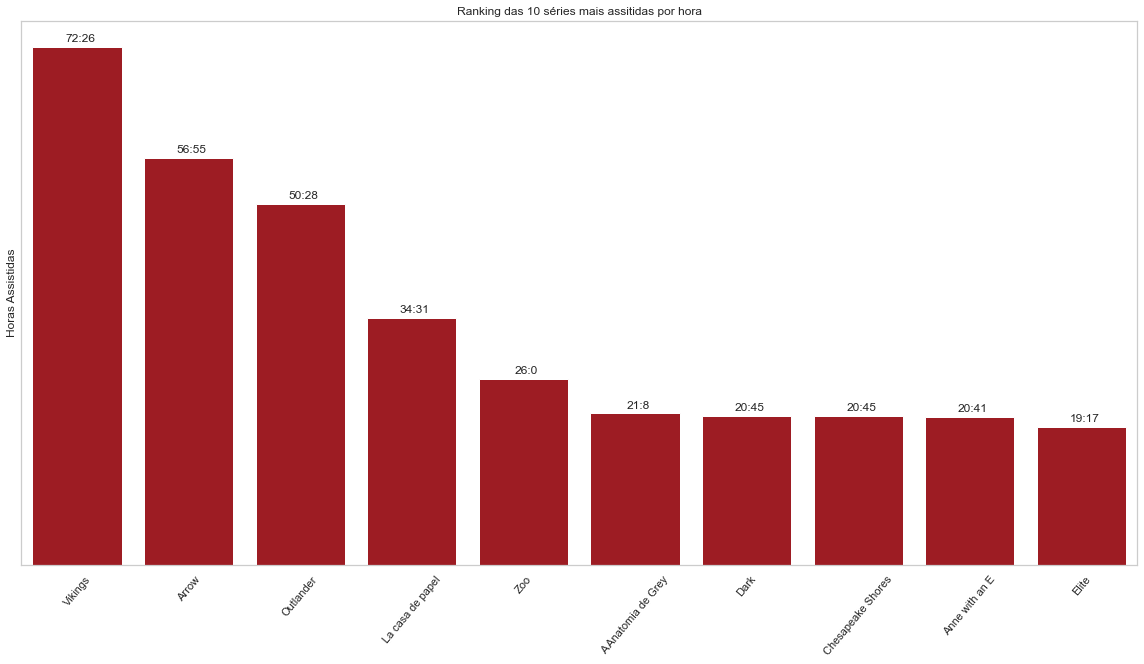

In [29]:
fig = plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
bars = sns.barplot( x=series_by_hour.index, y=series_by_hour.values,color='#B20710')
plt.xticks(rotation = 50)
plt.yticks([],[])
plt.xlabel('')
plt.ylabel('Horas Assistidas')
plt.title('Ranking das 10 séries mais assitidas por hora')

for bar in bars.patches:
  height = bar.get_height()
  plt.annotate('{}:{}'.format(int(height/60), int(height%60)),
              xy=(bar.get_x() + bar.get_width() / 2, height),
              xytext=(3, 3),
              textcoords="offset points",
              ha='center', va='bottom')

plt.show()

#### TOP 10 séries TV por visualização

Não esperava que o Arrow estivesse em primeiro colocado, irei analisar de forma mais profunda para buscar insight.

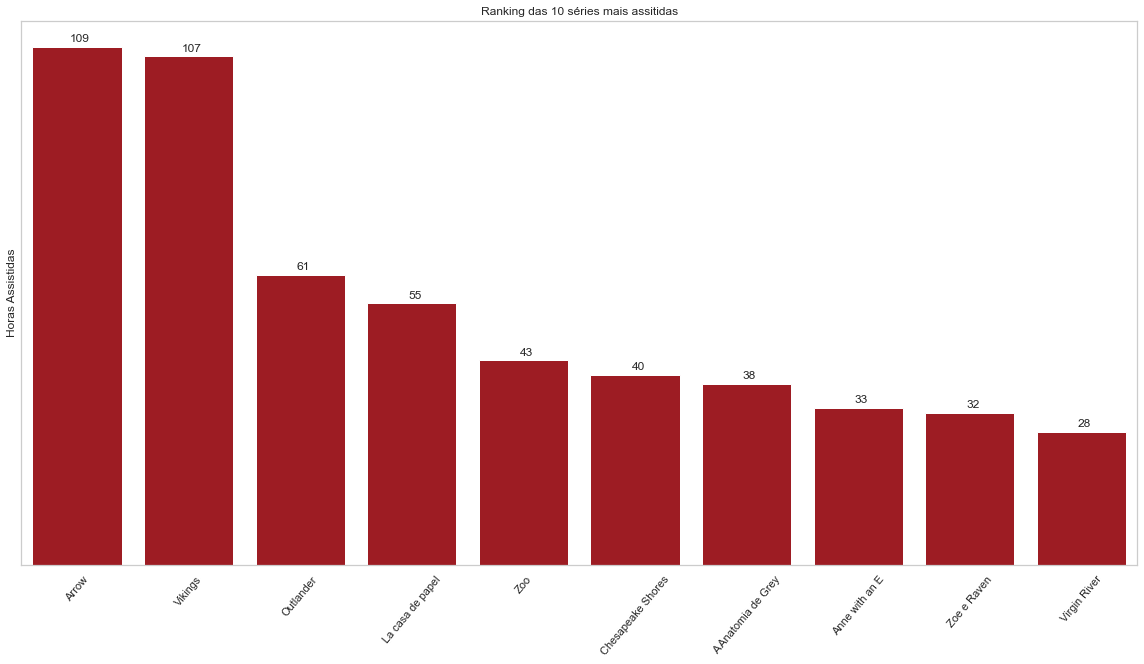

In [30]:
cont = df['Name Title'].value_counts().head(10)
fig = plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
bars = sns.barplot( x=cont.index, y=cont.values,color='#B20710')
plt.xticks(rotation = 50)
plt.yticks([],[])
plt.xlabel('')
plt.ylabel('Horas Assistidas')
plt.title('Ranking das 10 séries mais assitidas')

for bar in bars.patches:
  height = bar.get_height()
  plt.annotate('{}'.format(int(height)),
              xy=(bar.get_x() + bar.get_width() / 2, height),
              xytext=(3, 3),
              textcoords="offset points",
              ha='center', va='bottom')

plt.show()

#### TOP 10 episódios mais assistidos por duração (Serie TV)

Resultado que já esperava um pouco mas mesmo assim surpresos pela série the witcher, oculpando os três primeiros colocados.

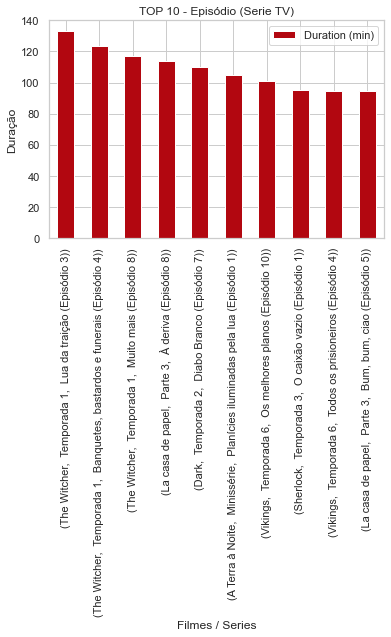

In [31]:
top_10 = df.groupby(['Name Title','Temporada','Episódio']).agg({'Duration (min)':'sum'}).sort_values(by='Duration (min)', ascending=False).head(10)
top_10.plot.bar(color='#B20710')
plt.title('TOP 10 - Episódio (Serie TV)')
plt.xlabel('Filmes / Series',fontsize=12)
plt.ylabel('Duração',fontsize=12)
plt.show()

#### Lista dos episódios que mais vezes assistir

In [32]:
cont_visualização = df.groupby(['Name Title', 'Temporada', 'Episódio'])['Start Time'].agg(['count'])
cont_visualização.sort_values('count', ascending=False).head(20)

count
Name Title                 Temporada    Episódio                                           
A Terra à Noite             Minissérie   Noites congeladas (Episódio 2)                   4
Arrow                       Temporada 2  Ponto fraco (Episódio 11)                        3
Em Busca de Watership Down  Minissérie   O cerco (Episódio 4)                             3
Narcos                      México       Temporada 2: Salvem o tigre (Episódio 1)         3
Arrow                       Temporada 4  Restauração (Episódio 3)                         3
A Terra à Noite             Minissérie   Cidades que não dormem (Episódio 5)              3
                                         Mares escuros (Episódio 4)                       3
Arrow                       Temporada 4  Almas perdidas (Episódio 6)                      3
Vikings                     Temporada 5  O rei pescador (Episódio 1)                      3
Mãe Só Tem Duas             Temporada 1  Final de semana em família (Episódio 7)          3
Vikings                     Temporada 6  Novos começos (Episódio 1)                       3
                                         O Profeta (Episódio 2)                           3
A Anatomia de Grey          Temporada 2  Um curativo no buraco da bala (Episódio 20)      3
La casa de papel            Parte 3      Bum, bum, ciao (Episódio 5)                      3
Arrow                       Temporada 2  Liga dos Assassinos (Episódio 5)                 3
Vikings                     Temporada 6  Todos os prisioneiros (Episódio 4)               3
La casa de papel            Parte 3      À deriva (Episódio 8)                            3
Arrow                       Temporada 1  Um homem inocente (Episódio 4)                   3
                                         Piloto (Episódio 1)                              3
                                         A empresa (Episódio 21)                          3

#### Comparação entre filmes e series TV

Text(0.5, 0, 'Quant. Visualização')

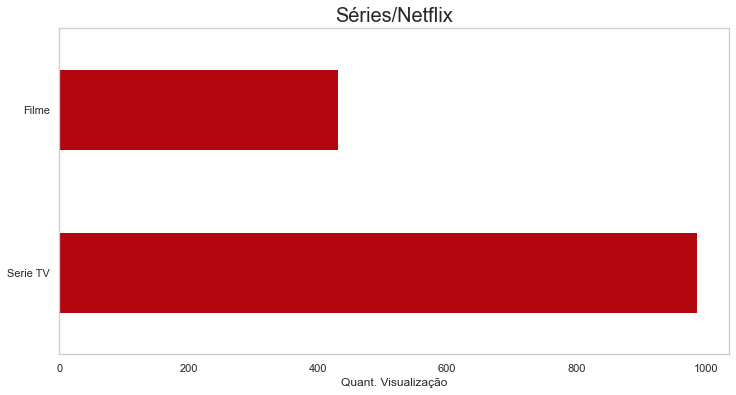

In [33]:
top_10 = df['Type View'].value_counts().head(10)
top_10.plot(kind='barh',figsize=(12,6), grid = False, rot=0,color='#B20710')
plt.title('Séries/Netflix', size=20)
plt.xlabel('Quant. Visualização')

#### Analisando a série Arrow

Análisando os meses que foi visto o Arrow, buscando respostas por está em primeiro lugar das serie mais assistidas

In [34]:
Arrow = df.loc[df['Name Title'].str.contains('Arrow', regex=False)]


C:\Users\demet\AppData\Local\Temp/ipykernel_13108/4276686654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Arrow['Mês'] = pd.Categorical(Arrow['Mês'], ordered=True)


Text(0.5, 1.0, 'Os meses mais frequentes que assistir a serie TV - Arrow.')

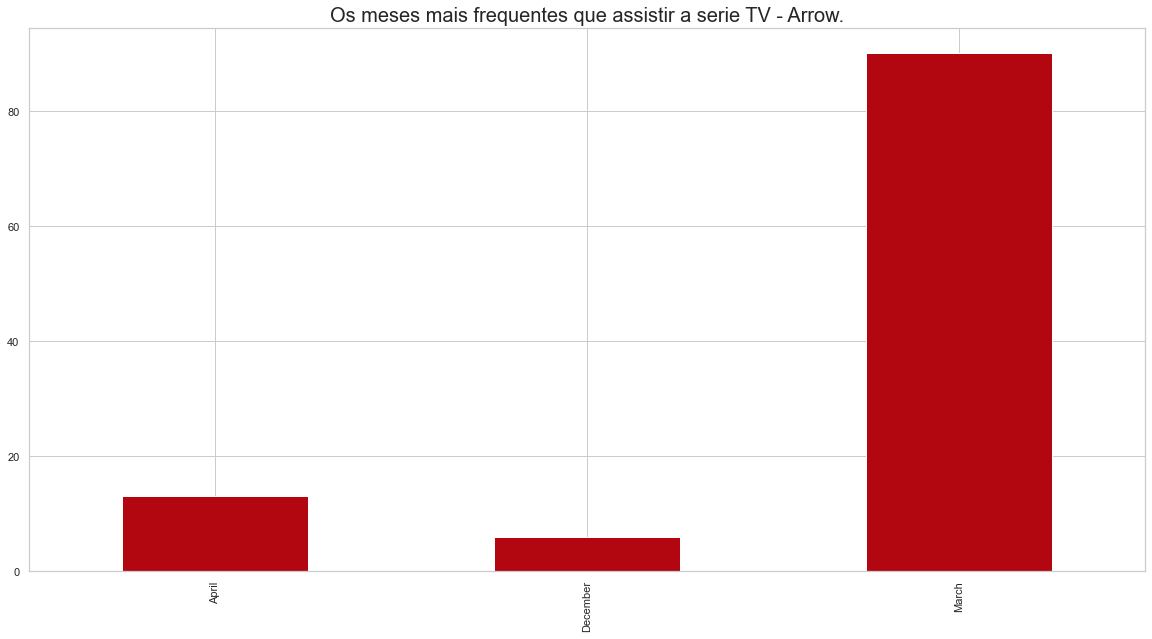

In [35]:
Arrow['Mês'] = pd.Categorical(Arrow['Mês'], ordered=True)
dados_hora = Arrow['Mês'].value_counts()
dados_hora = dados_hora.sort_index()
dados_hora.plot(kind='bar',color='#B20710',figsize=(20,10))
plt.title('Os meses mais frequentes que assistir a serie TV - Arrow.', size=20)

Análisando os horários que foi visto o Arrow, buscando respostas por está em primeiro lugar das serie mais assistidas.

In [36]:
Arrow = df.loc[df['Name Title'].str.contains('Arrow', regex=False)]

C:\Users\demet\AppData\Local\Temp/ipykernel_13108/267928599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Arrow['hour'] = pd.Categorical(Arrow['hour'], ordered=True)


Text(0.5, 1.0, 'Os horários mais frequentes que assistir a serie TV - Arrow.')

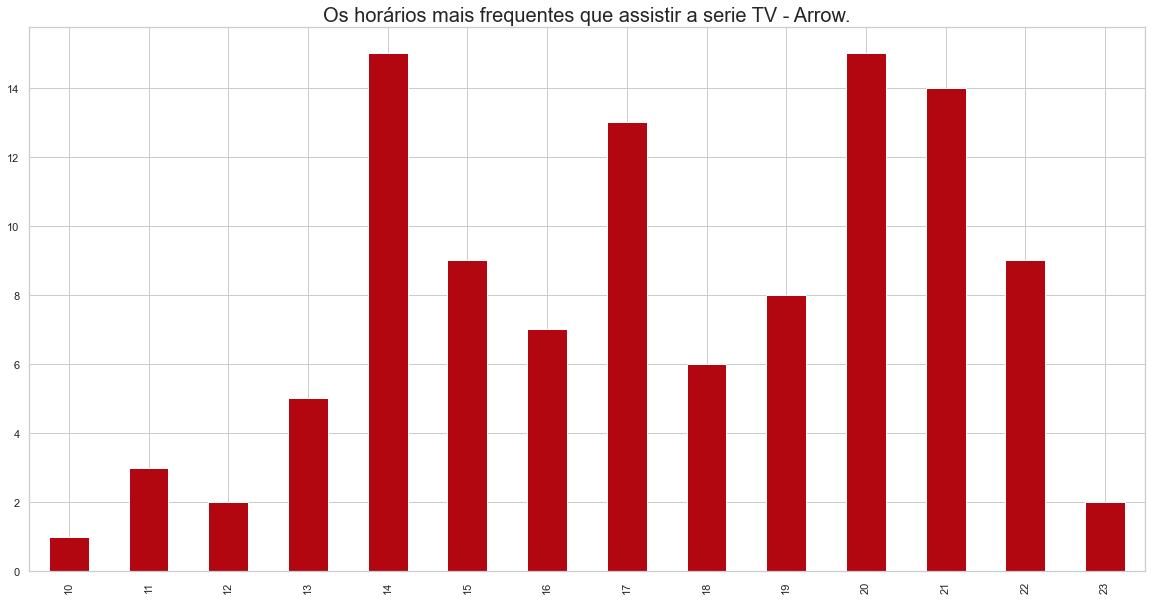

In [37]:
Arrow['hour'] = pd.Categorical(Arrow['hour'], ordered=True)
dados_hora = Arrow['hour'].value_counts()
dados_hora = dados_hora.sort_index()
dados_hora.plot(kind='bar', figsize=(20,10),color='#B20710')
plt.title('Os horários mais frequentes que assistir a serie TV - Arrow.', size=20)

### Nuvem de palavras para os titulos mais populares

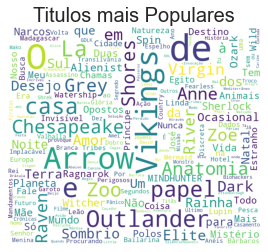

In [38]:
palavras = []
palavras = df['Name Title'].astype(str)
palavras = [x for x in palavras if str(x) != 'nan']
stopwords = STOPWORDS
wordcloud = WordCloud(width=700,height=600,background_color="white",mode="RGBA",stopwords=stopwords, max_font_size=100,collocations=False).generate(' '.join
                                                                                           (palavras))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Titulos mais Populares', fontsize=20)
plt.savefig('Base dados\Popular_Genres.png')
plt.show()

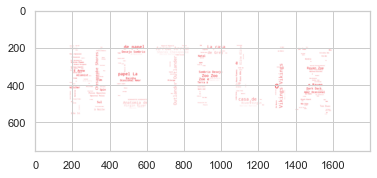

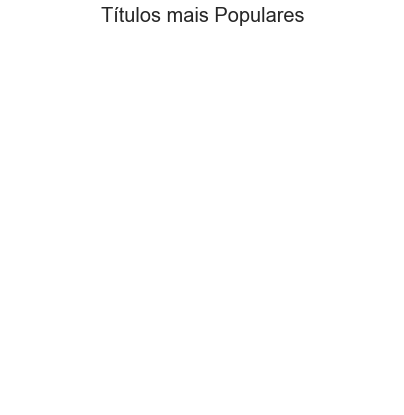

In [50]:
netflix_mask = np.array(Image.open(r'base dados\Netflix_Logo_RGB.png'))
palavras = []
palavras = df['Name Title'].astype(str)
palavras = [x for x in palavras if str(x) != 'nan']
stopwords = STOPWORDS
wordcloud = WordCloud(max_words=500, background_color="white",mode="RGBA", stopwords=stopwords,mask=netflix_mask).generate(' '.join
                                                                                           (palavras))
image_colors = ImageColorGenerator(netflix_mask)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.figure(figsize=[7,7])
plt.axis('off')
plt.title('Títulos mais Populares', fontsize=20)
plt.savefig('Base dados\Titulos_Popular.png')
plt.show()

## Transformando o dataframe em CSV

In [40]:
df.to_csv('netflix_demetrio.csv',index=False)

# DataFrame - IMDb

### A base de dados foi extraida apartir do site oficial da IMDb(https://www.imdb.com/interfaces/)

carregando a base em CSV com as avaliações do IMDb 

In [41]:
IMDb_ratings=pd.read_csv('base dados/title.ratings.tsv',sep='\t',header=0)

Carregando a base em CSV com as informações basicas dos filmes/series.

In [42]:
IMDb=pd.read_csv('base dados/title.basics.tsv',sep='\t',header=0)

C:\Users\demet\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [43]:
IMDb.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [44]:
IMDb_ratings.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1745
1,tt0000002,6.0,219
2,tt0000003,6.5,1505
3,tt0000004,6.1,136
4,tt0000005,6.2,2313


Utilizando merge para fundir as duas tabelas apartir da coluna "tconst"

In [45]:
IMDb_nota = pd.merge(IMDb_ratings, IMDb, how = 'left', on = 'tconst')
IMDb_nota.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1745,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,6.0,219,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,6.5,1505,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,6.1,136,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,6.2,2313,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


Executando o drop para as colunas que não seram utilizadas

In [46]:
IMDb_nota = IMDb_nota.drop(columns=['titleType','isAdult','endYear','runtimeMinutes'])

In [47]:
IMDb_nota

,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres
0,tt0000001,5.7,1745,Carmencita,Carmencita,1894,"Documentary,Short"
1,tt0000002,6.0,219,Le clown et ses chiens,Le clown et ses chiens,1892,"Animation,Short"
2,tt0000003,6.5,1505,Pauvre Pierrot,Pauvre Pierrot,1892,"Animation,Comedy,Romance"
3,tt0000004,6.1,136,Un bon bock,Un bon bock,1892,"Animation,Short"
4,tt0000005,6.2,2313,Blacksmith Scene,Blacksmith Scene,1893,"Comedy,Short"
...,...,...,...,...,...,...,...
1172906,tt9916682,5.6,5,Horrid Henry It's all Your Fault,Horrid Henry It's all Your Fault,2012,"Animation,Comedy,Family"
1172907,tt9916690,6.6,5,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,2012,"Animation,Comedy,Family"
1172908,tt9916720,5.4,115,The Nun 2,The Nun 2,2019,"Comedy,Horror,Mystery"
1172909,tt9916766,6.9,18,Episode #10.15,Episode #10.15,2019,"Family,Reality-TV"


# Transformando o dataframe em CSV

In [48]:
IMDb_nota.to_csv('IMDb_nota.csv',index=False)